### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [26]:
import pandas as pd

In [27]:
df=pd.read_csv('data/stud.csv')

In [28]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


this dataset have total  8 features, in which 3 features are numeric and remaining all are categorical

In [30]:
df.shape

(1000, 8)

# Check missing values in each columns

In [31]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Dataset do not have missing values

# Check is there any duplicate rows in the dataset

In [32]:
df.duplicated().sum()

np.int64(0)

Dataset do not have any duplicate rows

# Check data types of each column

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Dataset have total 8 columns and 5 columns datatype is object(categorical variable) and remaining 3 columns have int datatype(numerical variable)

# Finding unique values in each categorical variable
- gender
- race_ethnicity
- parental_level_of education
- lunch
- test_preparation_course

In [48]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [43]:
for column in df.columns:
    if df[column].dtype=='O':
        print(f"{column} column have {len(df[column].unique())} unique variables,which are {df[column].unique()}")

gender column have 2 unique variables,which are ['female' 'male']
race_ethnicity column have 5 unique variables,which are ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education column have 6 unique variables,which are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch column have 2 unique variables,which are ['standard' 'free/reduced']
test_preparation_course column have 2 unique variables,which are ['none' 'completed']


### This dataset have 5 categorical features and these categorical have unique variables,which is described below
- gender have 2 --> male and female 
- race_ethnicity have 5 --> group A, group B ,group C, group D, and group E
- parental_level_of_education have 6  --> some high school, high school, some college,associate's degree, bachelor's degree, and master's degree
- lunch have 2 --> standard and free/reduced
- test_preparation_course have 2 --> none, and completed 

# Statistics of numerical columns

In [47]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- Average score in each subject is approximatelly same which is near to 68
- there are difference in minimum score in each subject 
- and there are some students who have obtain maximum score 100 out of 100

# EDA

#### As we know we have 5 categorical variables so know we will check unique variables in each column so that we can choose which encoder we need to use to convert these categorical into numerical 

In [49]:
for column in df.columns:
    if df[column].dtype=='O':
        print(f"{column} have {len(df[column].unique())} unique categories, which are {df[column].unique()}")

gender have 2 unique categories, which are ['female' 'male']
race_ethnicity have 5 unique categories, which are ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education have 6 unique categories, which are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch have 2 unique categories, which are ['standard' 'free/reduced']
test_preparation_course have 2 unique categories, which are ['none' 'completed']


# Insight
- each column have <30 unqiue categories so --> Low cardinality
- except parental_level_eduction column all the Nominal and that one Ordinal

### So
- we can choose OneHot Encoder for all or for parental_level_education we can choose OrdinalEncoder

In [50]:
numerical_features=[]
categorical_features=[]

for column in df.columns:
    if df[column].dtype=="O":
        categorical_features.append(column)
    else:
        numerical_features.append(column)

In [51]:
print(numerical_features)
print(categorical_features)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# Visualization

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

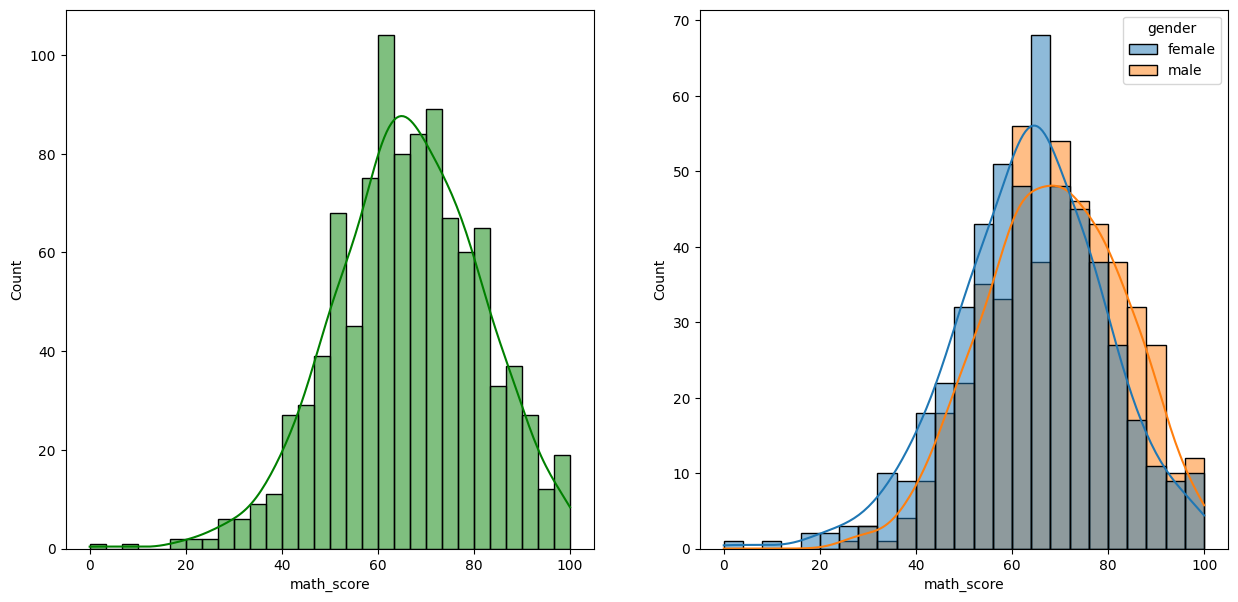

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='math_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='math_score',kde=True,hue='gender')
plt.show()

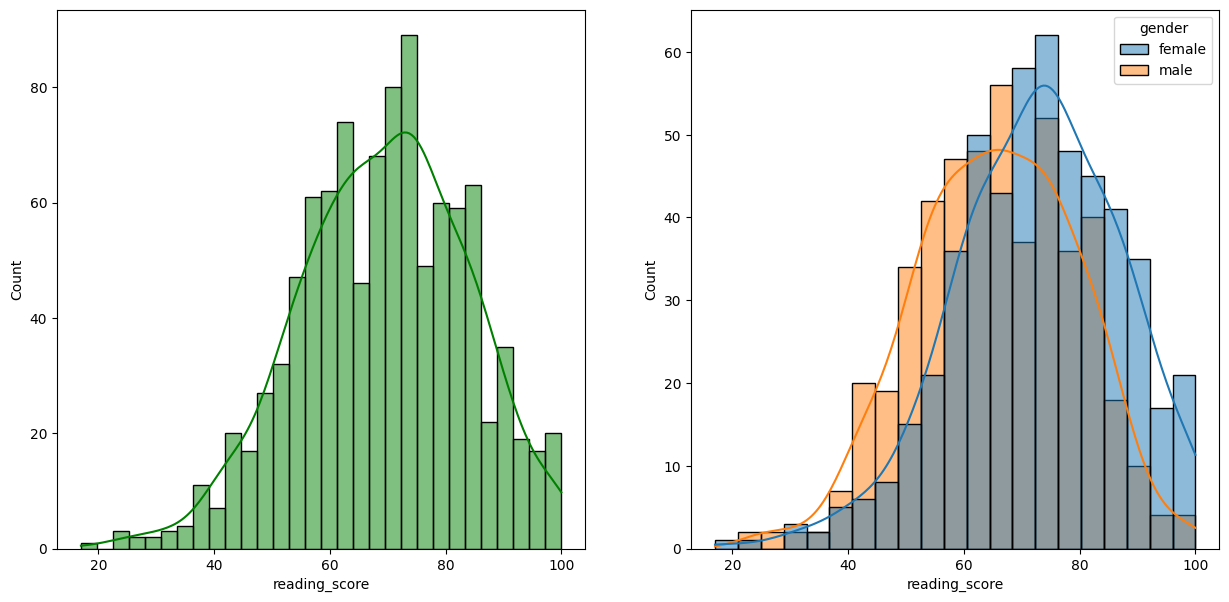

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='reading_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='reading_score',kde=True,hue='gender')
plt.show()

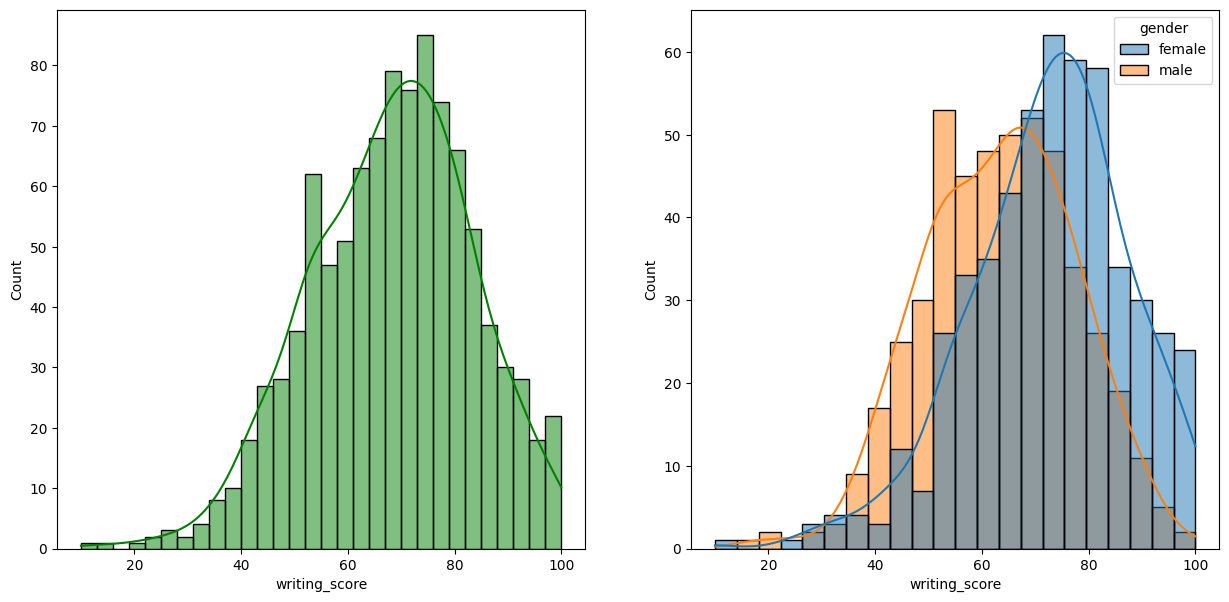

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='writing_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='writing_score',kde=True,hue='gender')
plt.show()

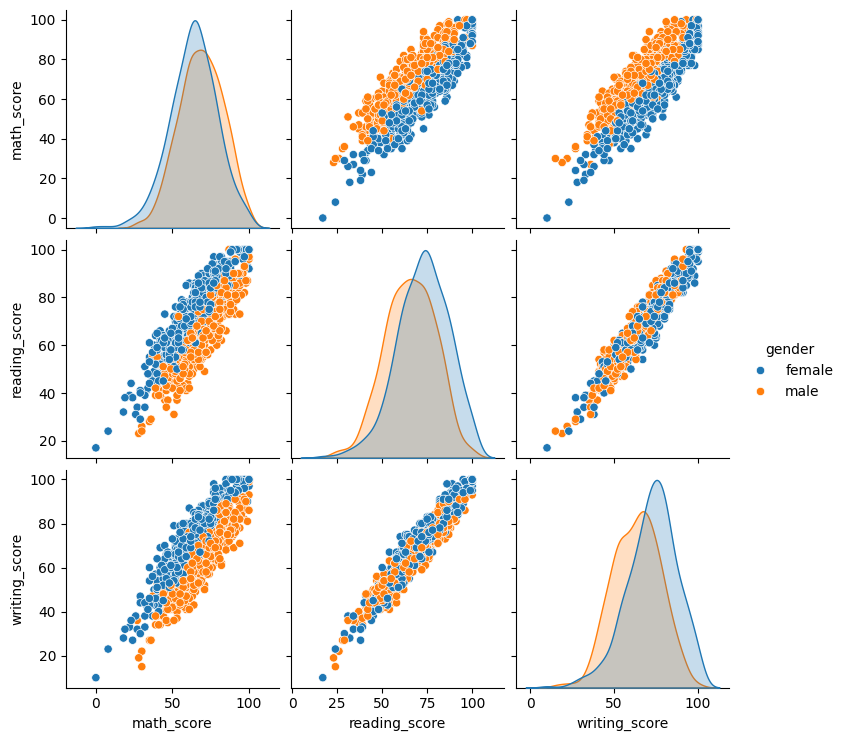

In [58]:
sns.pairplot(df,hue = 'gender')
plt.show()